**Variational inference using a Mean-field approximation**

In this code, we are going to show how to approximate a hierarchical Gaussian distribution using Variational Inference (VI) and a Mean Field approximation. Concretely, let us consider the case in which both the mean and the precision are unknown. The likelihood function on the mean $\mu$ and precision $\lambda=\sigma^{-2}$ is:

$p\left(x\mid\mu,\lambda\right)=\left(\frac{\lambda}{2\pi}\right)^{N/2}\exp\left(-\frac{\lambda}{2}\overset{N}{\underset{i=1}{\sum}}\left(x_{i}-\mu\right)^{2}\right)$

while the joint prior assumed to be

$p(\mu,\lambda)=p(\mu|\lambda)p(\lambda)=\mathcal{N}(\mu;\mu_{0},(\kappa_{0}\lambda)^{-1})\mathcal{G}(\lambda;\alpha_{0},\beta_{0})$

where we have used the following notation, where $\mathcal{N}$ denotes the normal distribution, and $\mathcal{G}$ denotes the gamma distribution:

$\begin{cases}
\mathcal{N}(\mu;\mu_{0},(\kappa_{0}\lambda)^{-1}) & =\frac{\sqrt{\kappa_{0}\lambda}}{\sqrt{2\pi}}\exp\left(-\frac{\kappa_{0}\lambda}{2}\left(\mu-\mu_{0}\right)^{2}\right)\\
\mathcal{G}(\lambda;\alpha_{0},\beta_{0}) & =\frac{\beta_{0}^{\alpha_{0}}}{\varGamma\left(\alpha_{0}\right)}\lambda^{\alpha_{0}-1}\exp\left(-\lambda\beta_{0}\right)
\end{cases}$

The goal is to find a Mean Field approximation of the posterior $p(\mu,\lambda\mid x)$. If you have any questions, you can contact the instructor.

The first thing we need to do is to import the necessary libraries. We will use numpy, matplotlib and scipy. We will also use the magic command `%matplotlib inline` to show the plots in the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
from scipy import interpolate
from scipy.stats import gamma
from scipy.special import gamma as gamma_f

Thus, the problem we want to solve is a Variational Inference problem, where we want to minimize:

$\mathcal{L}\left(q\left(\mu,\lambda;\phi\right)\right)=\mathbb{KL}\left(q\left(\mu,\lambda;\phi\right)\mid\mid p(\mu,\lambda\mid x)\right)$

where

$p(\mu,\lambda\mid x)\propto p(x\mid\mu,\lambda)p(\mu,\lambda) =\left(\frac{\lambda}{2\pi}\right)^{N/2}\exp\left(-\frac{\lambda}{2}\overset{N}{\underset{i=1}{\sum}}\left(x_{i}-\mu\right)^{2}\right)\mathcal{N}(\mu;\mu_{0},(\kappa_{0}\lambda)^{-1})\mathcal{G}(\lambda;\alpha_{0},\beta_{0})$

We use a Mean Field approximation $q(\mu,\lambda;\phi)=q_{\mu}(\mu;\phi)q_{\lambda}(\lambda;\phi)$, and as seen in the slides, we have to solve one of the next approaches:
* $q_{\mu}\left(\mu;\phi\right)\propto\exp\left(E_{\lambda}\left(\ln p(\mu,\lambda\mid x)\right)\right);\quad q_{\lambda}\left(\lambda;\phi\right)\propto\exp\left(E_{\mu}\left(\ln p(\mu,\lambda\mid x)\right)\right)$
* $\ln q_{\mu}\left(\mu;\phi\right)\propto E_{\lambda}\left(\ln p(\mu,\lambda\mid x)\right);\quad \ln q_{\lambda}\left(\lambda;\phi\right)\propto E_{\mu}\left(\ln p(\mu,\lambda\mid x)\right)$

The calculation of the exact posterior is complicated (out of the scope of the present course), but we can proof that it is a Normal-Gamma distribution (denoted as $\mathcal{NG}$):

$p(\mu,\lambda\mid x)=\mathcal{NG}\left(\mu,\lambda;\mu_{exact},\kappa_{exact},\alpha_{exact},\beta_{exact}\right)$

where the parameters $\mu_{exact}$, $\kappa_{exact}$, $\alpha_{exact}$ and $\beta_{exact}$ are:

* $\mu_{exact}=\frac{\kappa_{0}\mu_{0}+N\overline{x}}{\kappa_{0}+N}$
* $\beta_{exact}=\beta_{0}+\frac{1}{2}\overset{N}{\underset{i=1}{\sum}}\left(x_{i}-\overline{x}\right)^{2}+\frac{\kappa_{0}N\left(\overline{x}-\mu_{0}\right)^{2}}{2\left(\kappa_{0}+N\right)}$
* $\kappa_{exact}=\kappa_{0}+N$
* $\alpha_{exact}=\alpha_{0}+N/2$

where $\overline{x}=\frac{1}{N}\overset{N}{\underset{i=1}{\sum}}x_{i}$.

Since the Normal-Gamma distribution is new to you, in the next cell of code we are going to plot the distribution for some values of the parameters. We will also plot the contour of the distribution, and the contour of the distribution, so that you can visualize how this distribution looks.

Parameter values: mu =  0.0 ; kappa =  2.0 ; alpha =  5.0 ; beta =  6.0


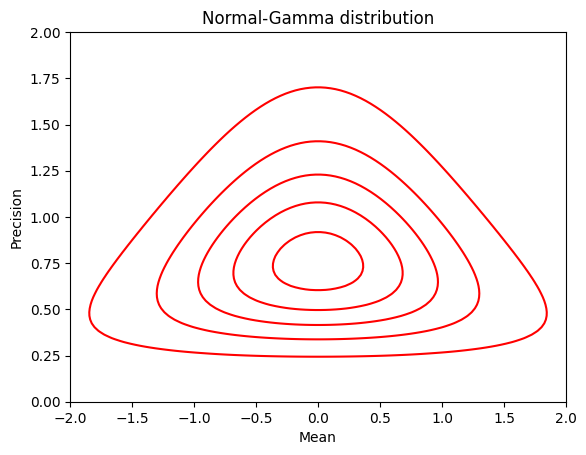

In [2]:
def normal_gamma_pdf(x, y, mu, k, alpha, beta):  # PDF of a normal-gamma distribution
  t1 = np.power(beta, alpha) * np.sqrt(k) / (np.sqrt(2 * np.pi) * gamma_f(alpha))
  t2 = np.exp(-k * y * 0.5 * np.square(x - mu))
  t3 = np.power(y, alpha - 0.5) * np.exp(-beta * y)
  return t1 * t2 * t3

def get_contour(samples, n=1000, vals=np.array([0.9, 0.7, 0.5, 0.3, 0.1])): # Function to get the contour levels
  t = np.linspace(0, samples.max(), n)
  integral = ((samples >= t[:, None, None]) * samples).sum(axis=(1,2))
  f = interpolate.interp1d(integral, t)
  return f(vals)

x_min = -2
x_max = 2
y_min = 0
y_max = 2
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Define the parameters of the distribution
mu = 0.0
kappa = 2.0
alpha = 5.0
beta = 6.0

print('Parameter values: mu = ', mu, '; kappa = ', kappa, '; alpha = ', alpha, '; beta = ', beta)

z = normal_gamma_pdf(X, Y, mu, kappa, alpha, beta)
z = z / z.sum()
c = get_contour(z)
plt.contour(X, Y, z, c, extent=[x_min, x_max, y_min, y_max], colors='r')
plt.xlabel('Mean')
plt.ylabel('Precision')
plt.title('Normal-Gamma distribution')
plt.show()

Let us go back to the Mean Field approximation. It can be proven that the solution of the Mean Field approximation is:

* $q_{\mu}^{*}(\mu)=\mathcal{N}\left(\mu;\mu_{N},\lambda_{N}^{-1}\right)\rightarrow\begin{cases}
\mu_{N}=\frac{\kappa_{0}\mu_{0}+N\overline{x}}{\kappa_{0}+N}\\
\lambda_{N}=\left(\kappa_{0}+N\right)\mathbb{E}_{\lambda}\left(\lambda\right)
\end{cases}$

* $q_{\lambda}^{*}(\lambda)=\mathcal{G}(\lambda;\alpha_{N},\beta_{N})\rightarrow\begin{cases}
\alpha_{N}=\alpha_{0}+\frac{N}{2}\\
\beta_{N}=\beta_{0}+\frac{1}{2}\left(\overset{N}{\underset{i=1}{\sum}}x_{i}^{2}+N \mathbb{E}_{\mu} \left( \mu^{2} \right)-2 \mathbb{E}_{\mu}\left( \mu \right) \overset{N}{\underset{i=1}{\sum}}x_{i}\right) +\frac{\kappa_{0}}{2}\left(\mathbb{E}_{\mu} \left(\mu^{2} \right)+\mu_{0}^{2}-2 \mu_{0} \mathbb{E}_{\mu}\left(\mu \right)\right)
\end{cases}$

and the solutions depend on the expected values of $\mu$ and $\lambda$, and hence, the solutions are interdependent. Therefore, we need to use an iterative algorithm to solve the problem. We will initially guess $\mathbb{E}_{\lambda}(\lambda)$, use this value to estimate the distribution $q_{\mu}(\mu)$, and with this distribution, we will estimate $\mathbb{E}_{\mu}(\mu)$ and $\mathbb{E}_{\mu}(\mu^2)$, and then use this value to estimate $q_{\lambda}(\lambda)$, and so on. This algorithm is directly implemented in the next cell of code, where we note that the expectations on $\mu$ and $\lambda$ can be obtained as follows:

* $\mathbb{E}_{\mu}(\mu)=\mu_{N}$, which comes from the fact that $q_{\mu}(\mu)$ is a normal distribution.
* $\mathbb{E}_{\mu}(\mu^{2})=\frac{1}{\lambda_{N}}+\mu_{N}^{2}$, which comes from the fact that $\lambda_{N} = \sigma_{N}^{-2}$, and remembering that $\sigma^2_{N} = \mathbb{E}_{\mu}(\mu^{2}) - \mu_{N}^{2}$.
* $\mathbb{E}_{\lambda}(\lambda)=\frac{\alpha_{N}}{\beta_{N}}$, which comes from the fact that $q_{\lambda}(\lambda)$ is a gamma distribution.

Note that the algorithm converges in the first iteration.

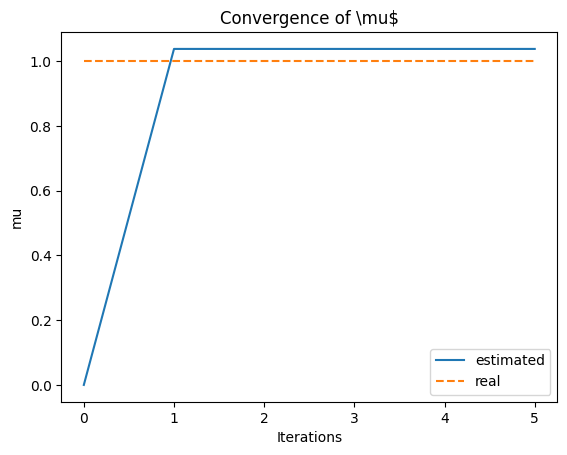

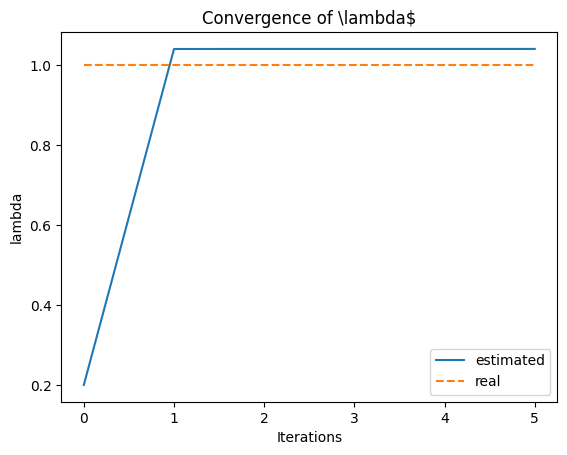

In [3]:
# First, generate the samples of the distribution
mu = 1.0  # Actual mean of the gaussian distribution, \mu
lam = 1.0  # Actual precision of the gaussian distribution, \lambda
n_samples = 200  # Number of samples to generate
samples = np.random.normal(loc=mu, scale=1/np.sqrt(lam), size=n_samples)  # Samples generated from the distribution, x_i

# Now, initialize the parameters needed for the Mean-Field approximation
e_lam = 1.0  # Initial guess for the expected value of the precision, \lambda
n_iter = 5  # Number of iterations of the algorithm
k_vals = [1.0]  # Vector to store the values of \kappa, containing the value of \kappa_0
mu_vals = [0.0]  # Vector to store the values of \mu, containing the value of \mu_0
alpha_vals = [2.0] # Vector to store the values of \alpha, containing the value of \alpha_0
beta_vals = [10.0] # Vector to store the values of \beta, containing the value of \beta_0
lam_vals = [] # Vector to store the values of \lambda, to be computed in the Mean-Field approximation

for i in range(n_iter):  # Iterative algorithm
  # First, we update the values of \mu and \lambda using the current expected value of \lambda
  mu_vals.append((k_vals[0] * mu_vals[0] + np.sum(samples)) / (k_vals[0] + n_samples))
  lam_vals.append((k_vals[0] + n_samples) * e_lam)
  # We now update the mean of \mu and its expected squared value
  e_mu = mu_vals[-1]
  e_mu_2 = 1 / lam_vals[-1] + mu_vals[-1] ** 2
  # Update alpha and beta using the updated values of \mu and \lambda
  alpha_vals.append(alpha_vals[0] + n_samples / 2)
  t1 = 0.5 * (np.sum(np.square(samples)) + n_samples * e_mu_2 - 2 * e_mu * np.sum(samples))
  t2 = 0.5 * k_vals[0] * (e_mu_2 + mu_vals[0] ** 2 - 2 * mu_vals[0] * e_mu)
  beta_vals.append(beta_vals[0] + t1 + t2)
  # Update lambda moment
  e_lam = alpha_vals[-1] / beta_vals[-1]

# Show the convergence of the algorithm
plt.plot(mu_vals, label='estimated')
plt.plot(mu * np.ones(n_iter + 1), label='real', linestyle='dashed')
plt.xlabel('Iterations')
plt.ylabel('mu')
plt.title('Convergence of \mu$')
plt.legend(loc='best')
plt.show()

plt.plot(np.array(alpha_vals) / np.array(beta_vals), label='estimated')
plt.plot(mu * np.ones(n_iter + 1), label='real', linestyle='dashed')
plt.xlabel('Iterations')
plt.ylabel('lambda')
plt.title('Convergence of \lambda$')
plt.legend(loc='best')
plt.show()

Let us now proceed to use the estimated values of $\mu$ and $\lambda$ to generate new samples from the estimated distribution. We will also plot the histogram of the original samples and the generated samples, and the pdf of the original distribution and the pdf of the estimated distribution.

Original values: mu =  1.0 ; precision =  1.0
Estimated values (parameters): mu =  1.0382287749852255 ; precision =  1.0397258909107796
Estimated values (average from samples): mu =  1.0445845914249536 ; precision =  1.03325264661237


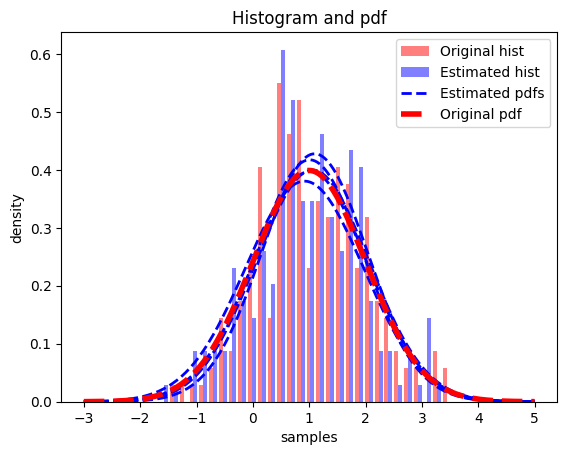

In [4]:
mu_est = np.random.normal(loc=mu_vals[-1], scale=1/np.sqrt(lam_vals[-1]), size=n_samples)  # Estimated mu sampled from the posterior
lam_est = np.random.gamma(shape=alpha_vals[-1], scale=1/beta_vals[-1], size=n_samples)  # Estimated lambda sampled from the posterior

samples_new = np.random.normal(loc=mu_est, scale=1/np.sqrt(lam_est))  # New data generated using estimated parameters

print('Original values: mu = ', mu, '; precision = ', lam)
print('Estimated values (parameters): mu = ', mu_vals[-1], '; precision = ', alpha_vals[-1] / beta_vals[-1])
print('Estimated values (average from samples): mu = ', np.mean(mu_est), '; precision = ', np.mean(lam_est))

# Plot the histogram of original and generated samples
plt.hist([samples, samples_new], bins=30, density=True, color=['r', 'b'], label=['Original hist', 'Estimated hist'], alpha=0.5)  # Histogram: with original and estimated values

# Obtain the pdfs
x_range = np.linspace(mu - 4 / np.sqrt(lam), mu + 4 / np.sqrt(lam), n_samples)

pdf = [1/(np.sqrt(2*np.pi / lam) ) * np.exp(-np.square((x_range - mu) * np.sqrt(lam)) / 2 )] + [1/(np.sqrt(2*np.pi / le) ) * np.exp(-np.square((x_range - mue) * np.sqrt(le)) / 2 ) for mue, le in zip(list(mu_est), list(lam_est))]  # Original + One pdf per posterior sample

plt.plot(x_range, pdf[1], color='b', linewidth=2, linestyle='dashed', label='Estimated pdfs')
for i in range(4):  # Plot only 5 posterior pdfs (4 in the loop, and the one before; the reason to have one pdf out of the loop is to prevent multiple labels)
  plt.plot(x_range, pdf[2 + i], color='b', linewidth=2, linestyle='dashed')
plt.plot(x_range, pdf[0], color='r', linewidth=4, linestyle='dashed', label='Original pdf')
plt.xlabel('samples')
plt.ylabel('density')
plt.title('Histogram and pdf')
plt.legend(loc='best')
plt.show()

Finally, we will plot the evolution of the parametersduring the iterations using the contour plot of the Normal-Gamma distribution. We will plot the contour of the original distribution, the contour of the initial Mean-Field approximation, and the contour of the final Mean-Field approximation: you can see that the final Mean-Field approximation fits quite well the original distribution.

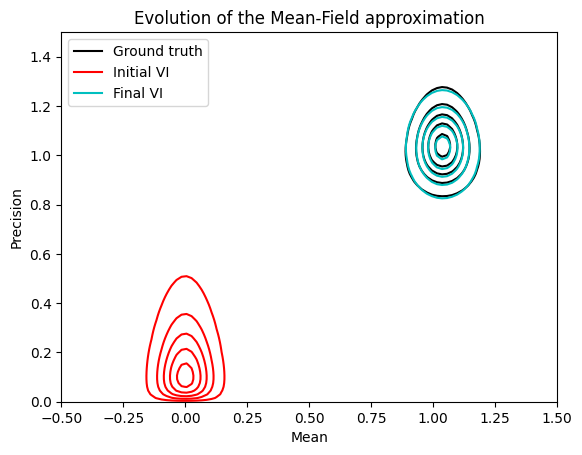

In [5]:
# Plot the results
def plot_contour(X, Y, mu, lam, alpha, beta, extent, color='b'):  # Function to add the contour plot of the VI approximation
  mu_pdf = 1 / np.sqrt(2 * np.pi / lam) * np.exp(-0.5 * np.square(X - mu) * lam)
  lam_pdf = gamma.pdf(Y, alpha, scale=1 / beta)
  z = mu_pdf * lam_pdf
  z = z / z.sum()
  c = get_contour(z)
  plt.contour(X, Y, z, c, extent=extent, colors=color)

mu_min = -0.5
mu_max = 1.5
lam_min = 0
lam_max = 1.5

mu_v, lam_v = np.meshgrid(np.linspace(mu_min, mu_max, 100), np.linspace(lam_min, lam_max, 100))

# Actual distribution
mu_ac = (k_vals[0] * mu_vals[0] + np.sum(samples)) / (k_vals[0] + n_samples)
lam_ac = k_vals[0] + n_samples
alpha_ac = alpha_vals[0] + n_samples / 2
beta_ac = beta_vals[0] + 0.5 * (np.sum(np.square(samples - np.mean(samples)))) + 0.5 * k_vals[0] * n_samples * np.square(np.mean(samples) - mu_vals[0]) / (k_vals[0] + n_samples)
z = normal_gamma_pdf(mu_v, lam_v, mu_ac, lam_ac, alpha_ac, beta_ac)
z = z / z.sum()
c = get_contour(z)
plt.contour(mu_v, lam_v, z, c, extent=[mu_min, mu_max, lam_min, lam_max], colors='k')

# Now, plot the initial value
plot_contour(mu_v, lam_v, mu_vals[0], lam_vals[0], alpha_vals[0], beta_vals[0], [mu_min, mu_max, lam_min, lam_max], color='r')
# And plot the final value
plot_contour(mu_v, lam_v, mu_vals[-1], lam_vals[-1], alpha_vals[-1], beta_vals[-1], [mu_min, mu_max, lam_min, lam_max], color='c')

plt.xlabel('Mean')
plt.ylabel('Precision')
plt.title('Evolution of the Mean-Field approximation')
custom_lines = [Line2D([0], [0], color='k'), Line2D([0], [0], color='r'), Line2D([0], [0], color='c')]
plt.legend(custom_lines, ['Ground truth', 'Initial VI', 'Final VI'], loc='upper left')
plt.show()